# Assignment 1: Visualizing the Wine Dataset
by:
- Sam Yao
- Michael Amberg
- Rebecca Kuhlman


### Data Sources
- [1] http://www3.dsi.uminho.pt/pcortez/wine5.pdf
- [2] https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## Business Understanding

- Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). 
- What is the prediction task for your data and why are other third parties interested in the result? 
- Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
- Be specific and use your own words to describe the aspects of the data.

### In your own words, give an overview of the dataset.
This dataset describes several physical and chemical qualities of various wines (both white and red) from Portugal [1]. These characteristics, such as pH, citric acid, alcohol content, and residual sugar, were tested by physicochemical machines by the CVRVV, the official wine testing entity of the region of Portugal which these wines were made. The output was determined by a minimum of three human judges, who judged the wine quality on a scale of 0-10 (0 being bad and 10 being excellent). 

### What is the prediction task for your data and why are other third parties interested in the result? 
We are to predict the rating of a wine, given its qualities, on a scale of one to ten. Third-party entities, such as winemakers and related businesses, are interested in these results so that they can determine what chemically constitutes a wine that will rank high. Then, wine can be manufactured that focuses on this attribute (or less on this attribute if there is a strong negative correlation between the rankin and a certain attribute). This high ranking can be used to market those wines, bringing in profits for the company.

### Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
Wine is often viewed as a very subjective experience. Wine chemical composition varies from year to year depending on the overall climate of the growing season. Given that quality is extremely subjective and variable, there is not a strong need for an extremely precise algorithm. With these considerations, a 60-70% accuracy will be deemed acceptable.

### Describing data attributes in own words.

The data is broken into 12 features across 2 datasets. Of these, 11 are numerical and 1 ordinal. We can merge these datasets and make an additional categorical feature to represent the type of wine (red or white).

The 11 numerical features represent specific chemical attributes of each wine. Some of these attributes are understood easily by the title, such as alcohol being the alcohol % of the wine and pH representing the pH level. The remaining 9 features do not have a clear explanation, but most have a similar range so we assume they use a similar metric, such as parts per million.

The dataset is split into two initial csv files: white wine and red wine. When combined, there are 4898 total samples for white wine while there are 1599 samples for red wine. 

Here is an table explaining the attributes:
| Attribute | Description | Type | Unit |
| :--- | :----------- |:---| :----: |
| Fixed Acidity       | Acidity inherently in grapes|Ratio|g/dm^3|
| Volatile Acidity    | Acidity from the fermentation process, usually <br> indicates a presence of bacteria |Ratio|g/dm^3|
| Citric Acid         | A naturally occuring fixed acid |Ratio|g/dm^3|
| Residual Sugar      | Amount of sugar present after the fermentation process |Ratio|g/dm^3|
| Chlorides           | Amount of Chloride salts in the wine |Ratio|g/dm^3|
| Free Sulfur Dioxide | Amount of Sulfur Dioxide existing as is, not bound to other chemicals |Ratio|mg/dm^3|
| Total Sulfur Dioxide| Total amount of Sulfur Dioxide (SO2) in the wine, including <br> free and sulfates bound to other chemicals |Ratio|mg/dm^3|
| Density             | Mass per unit volume at 20 degrees Celsius. |Ratio|g/dm^3|
| pH                  | Acidity based on the pH Scale |Interval|N/A|
| Sulphates           | May be related to fermenting nutrition |Ratio|g/dm^3|
| Alcohol             | Alcohol percentage |Ratio|%|
| Quality             | Wine Score on a Scale of 0 to 10 |Ordinal|N/A|

All attributes except for pH and Quality are Ratio data types because for each of these attributes, there is an absolute zero, which means that at 0, there is none of the attribute present. Quality and pH are Ordinal and Interval respectively. Quality is scored on a rank with the implication that a higher number is better than a lower number, and pH is a scale used to measure the acidity, which the scale does not have an aboslute zero.

Source to create/format table: 
- https://www.markdownguide.org/extended-syntax/

Sources to Describe Attributes: 
- https://waterhouse.ucdavis.edu/whats-in-wine/
- https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
- https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/
- http://www.oiv.org/public/medias/2604/oiv-ma-d1-03.pdf
- https://www.oiv.int/public/medias/2468/oiv-ma-as2-01b.pdf

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
df_white_raw = pd.read_csv("winequality-white.csv")
df_red_raw = pd.read_csv("winequality-red.csv")
#Data csv format used ";" instead of ",", leading to us needing to manipulate file to use data

In [2]:
print(df_red_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [3]:
print(df_red_raw.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [4]:
print(df_white_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [5]:
print(df_white_raw.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [6]:
df_red_raw.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df_white_raw.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing data points in this dataset. The majority is numerical data. Whether a wine has sulfates or not could be made into categorical data, and whether the wine is red or white is categorical.
The numerical day can be broken down into groups, such as not acidic wine, light acidity, medium acidity, etc.
Red wine acidity ranges from 4ph to 3.3ph at the very lowest
White wine acidity ranges from 3.6 to 2.8ph, with the sweetest white wines being the most acidic.

## Reds vs White
First, we should analyze the differences between red and white wine in terms of their quality. A common difference is that white wines tend to be sweeter.

<AxesSubplot: xlabel='quality', ylabel='residual sugar'>

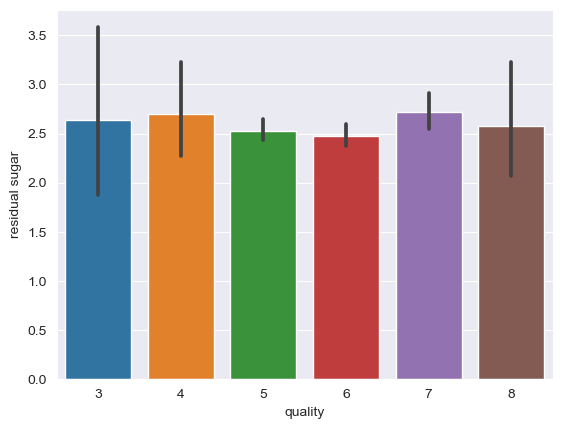

In [8]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df_red_raw)

<AxesSubplot: xlabel='quality', ylabel='residual sugar'>

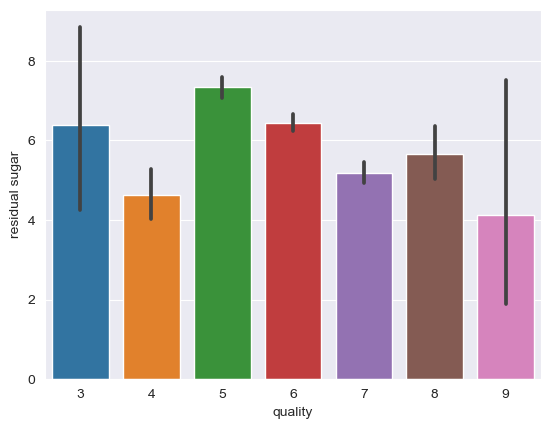

In [9]:
sns.barplot(x = 'quality', y = 'residual sugar', data = df_white_raw)

The residual sugar is on a much different scale between reds and whites. Reds, while having a bit of range, tend to have low residual sugar, while the whites vary much more with an even bigger range.

Fixed Acidity also differs between the reds and the whites.

<AxesSubplot: xlabel='quality', ylabel='fixed acidity'>

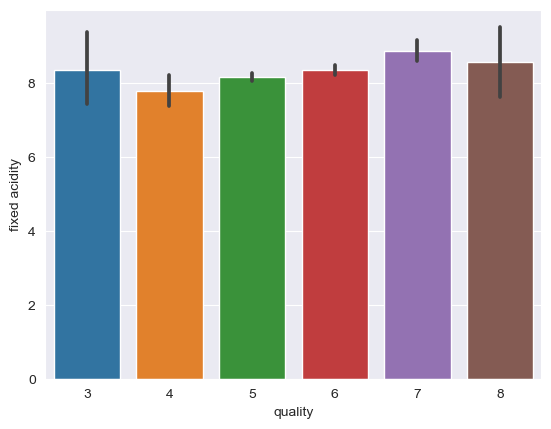

In [10]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_red_raw)

<AxesSubplot: xlabel='quality', ylabel='fixed acidity'>

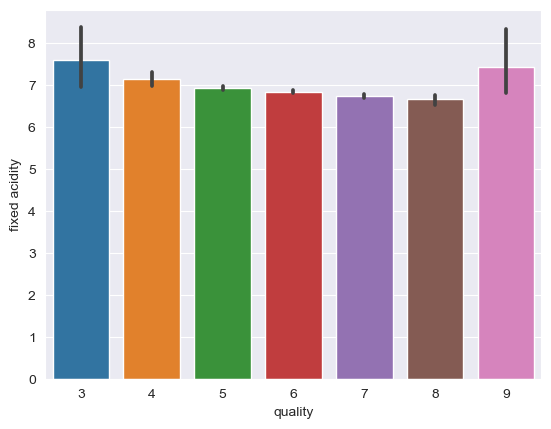

In [11]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_white_raw)

Fixed acidity and quality don't have a strong correlation for the reds, however, for the whites, fixed acidity appears to be bimodal in terms of quality. For the whites, there is a large range of fixed acidity in both the lowest quality and highest quality of wine, which is not present in those of mid-range quality. These differences are not present in the reds.

### White wine and red wine have different chemical compositions that factor into their quality

### Outlier concerns

Outliers are a significant concern in this dataset, for example, in the Total Sulfur dioxide column. While there already is a skew to the data, a few data points around 275 total sulfur dioxide would influence severely.

<AxesSubplot: xlabel='total sulfur dioxide', ylabel='Count'>

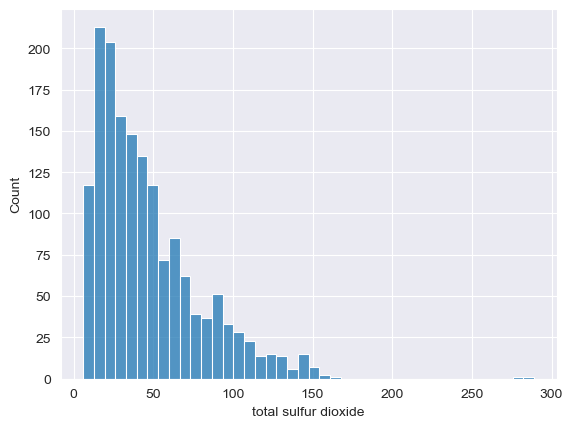

In [12]:
sns.histplot(df_red_raw, x="total sulfur dioxide")

How to deal with outliers is a difficult issue considering the subjective context of wine. A few changes can be made to avoid outliers, for example, using related but different chemical components. Free sulfur dioxide and total sulfur dioxide as are related, but the free sulfur dioxide is not as influenced by outliers.

<AxesSubplot: xlabel='free sulfur dioxide', ylabel='Count'>

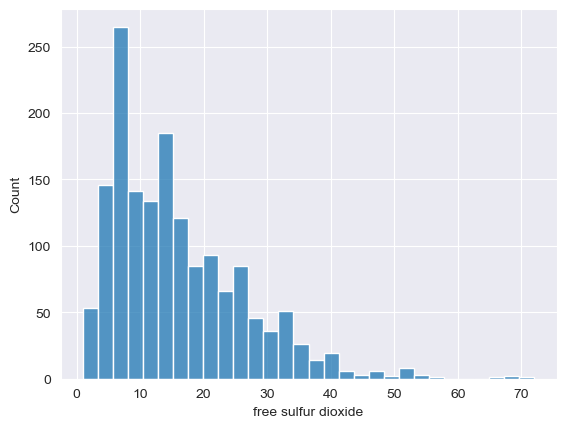

In [13]:
sns.histplot(df_red_raw, x="free sulfur dioxide")

In [14]:
df_groupedRed = df_red_raw.groupby(['quality'])
df_groupedRed.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

If an accurate model were to be made, extreme outliers ( >.98) should be removed from the dataset during training. These could negatively impact predictive capabilities.

### What attributes are the most impactful on quality?
### How does this change depending on wine type?
Red wine attributes comparison

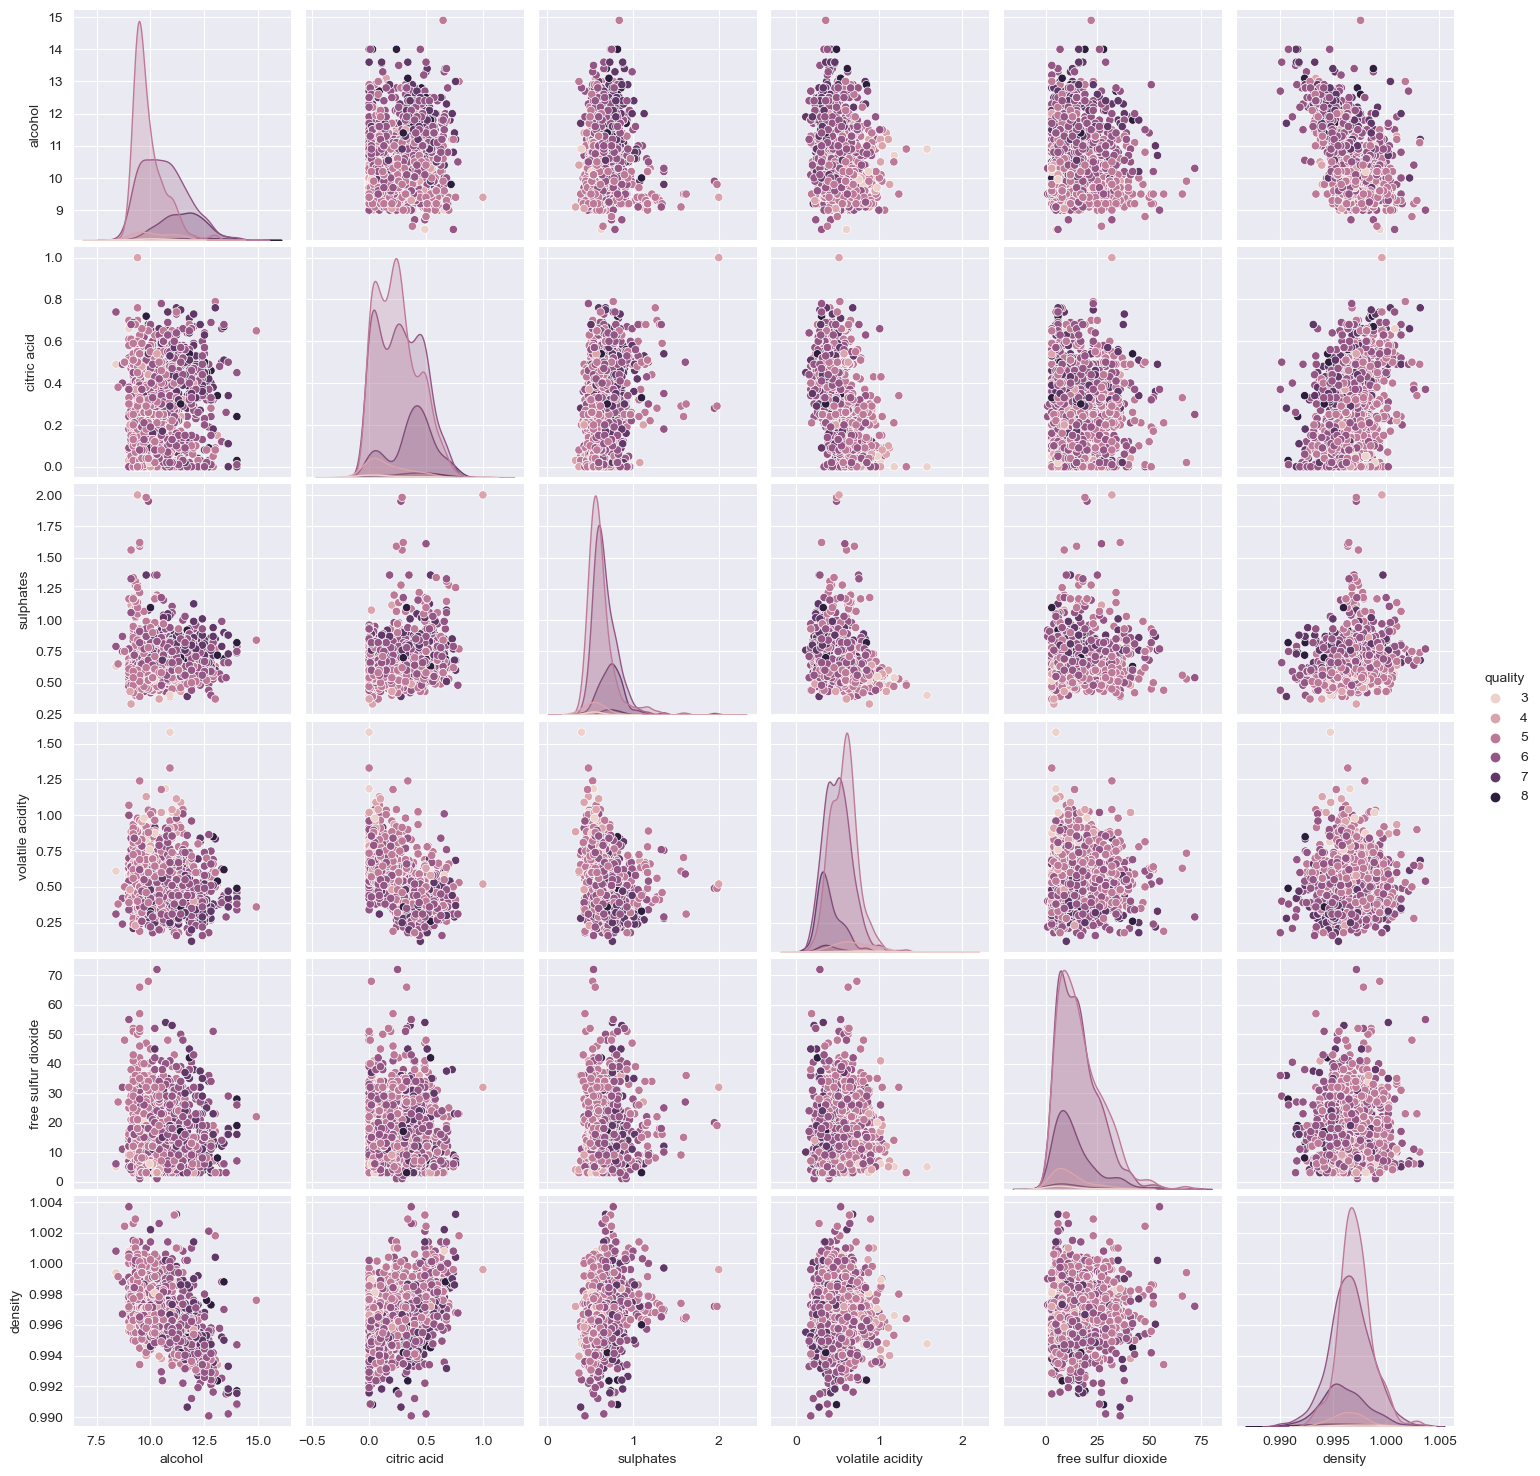

In [15]:
sns.pairplot(df_red_raw, hue="quality", vars=("alcohol", "citric acid", "sulphates", "volatile acidity", "free sulfur dioxide", "density"))
#sns.barplot(x = 'quality', y = 'pH_range', data = df_red_raw)

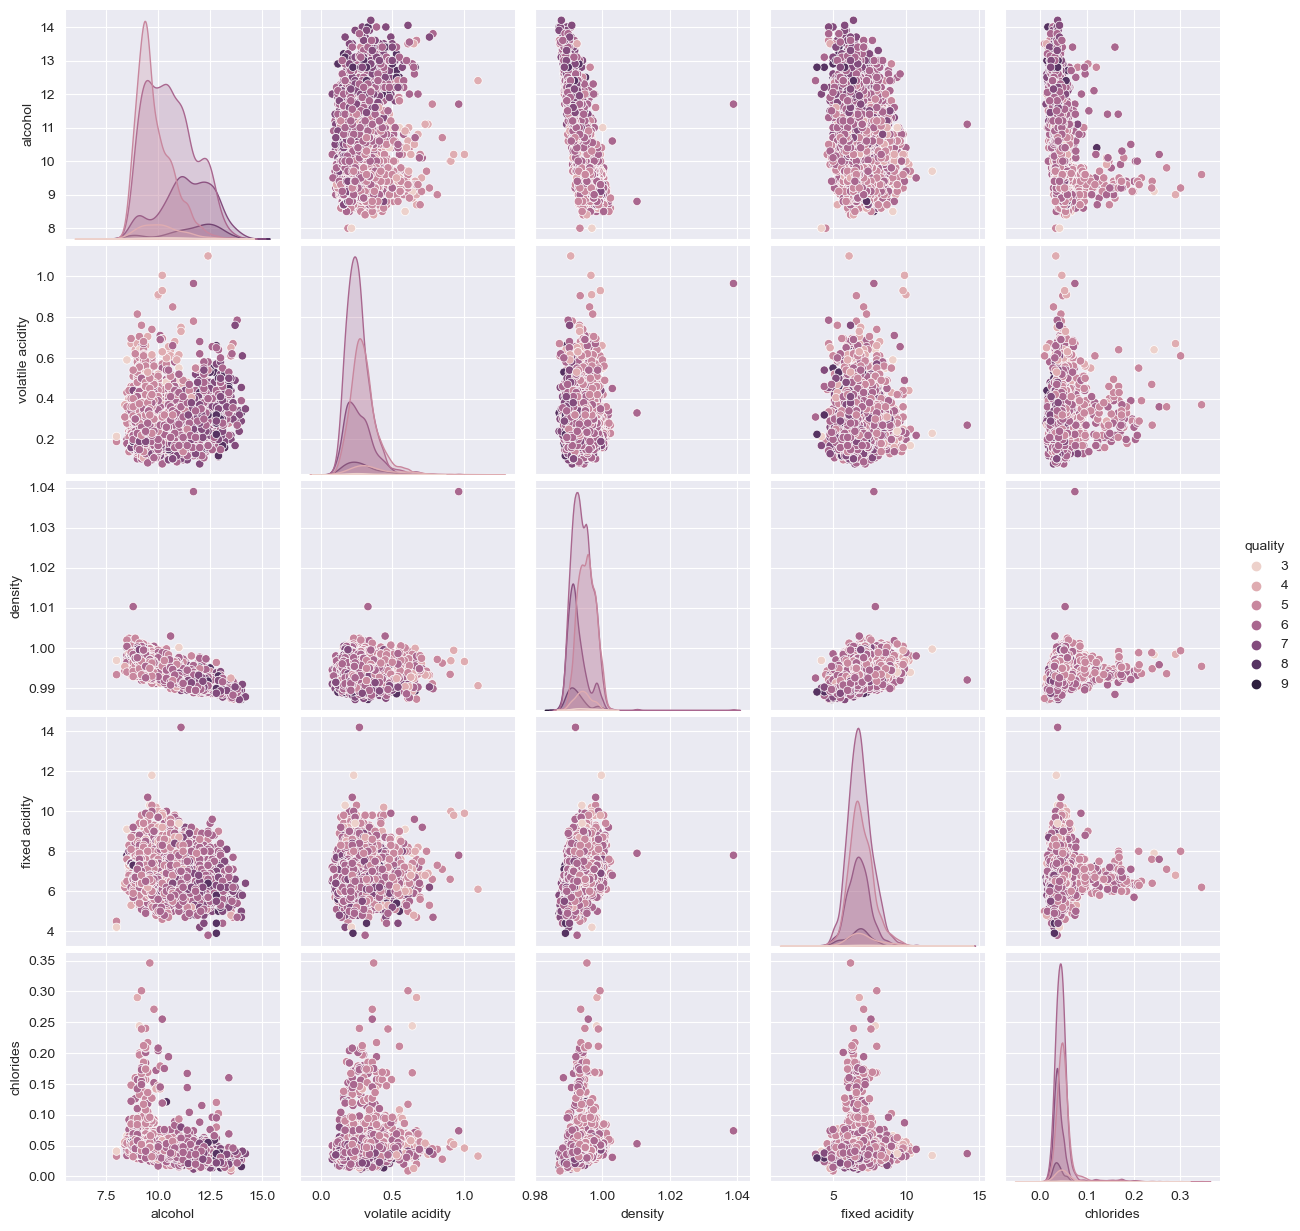

In [16]:
sns.pairplot(df_white_raw, hue="quality", vars=("alcohol", "volatile acidity", "density", "fixed acidity", "chlorides"))

Alcohol and Volatile Acidity are the most impactful on wine quality. Alcohol has a positive correlation with quality, while volatile acidity has a negative one. Density has a bigger negative correlation with quality on the white wines. Red wine density to quality doesn't have a very strong correlation. This is most likely because light white wines are considered favorable, while both bold and light red wines can be of high quality.

## Further Data Visualization

In [17]:
# merging the two datasets to allow for easier graphing.
dfRed = df_red_raw.copy()
dfRed['type'] = 'red'
dfRed['type#'] = 1
dfWhite = df_white_raw.copy()
dfWhite['type'] = 'white'
dfWhite['type#'] = 0

# The resulting dataset has 0 represent White Wine and 1 represent
df_merged = pd.concat([dfWhite,dfRed], axis = 0, ignore_index=True,)
df_merged

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality   type  type#  
0         8.8        6  white      0  
1         9.5        6  white      0  
2        10.1        6  white      0  
3         9.9        6  white      0  
4         9.9        6  white      0  
...       ...      ...    ...    ...  
6492     10.5        5    red      1  
6493     11.2        6    red      1  
6494     11.0        6    red      1  
6495     10.2        5    red      1  
6496     11.0        6    red      1  

[6497 rows x 14 columns]

<AxesSubplot: title={'center': 'total sulfur dioxide'}, xlabel='[type#, quality]'>

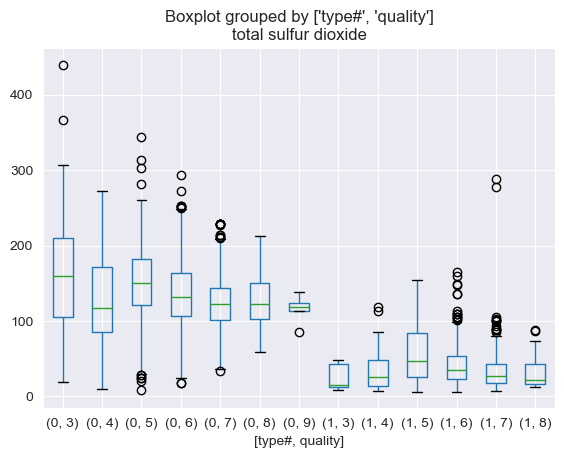

In [18]:
%matplotlib inline
df_merged.boxplot(column = ['total sulfur dioxide'], by=['type#','quality'])
# 0 represents white wine, 1 represents red wines

array([<AxesSubplot: title={'center': 'red'}>,
       <AxesSubplot: title={'center': 'white'}>], dtype=object)

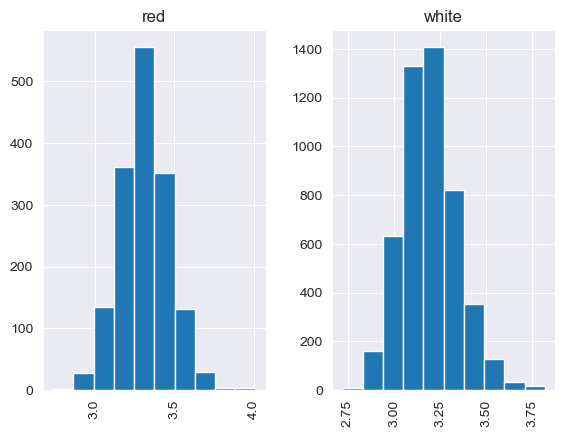

In [40]:
df_merged.hist(column=['pH'], by=['type'])

<AxesSubplot: title={'center': 'pH'}, xlabel='[type#, quality]'>

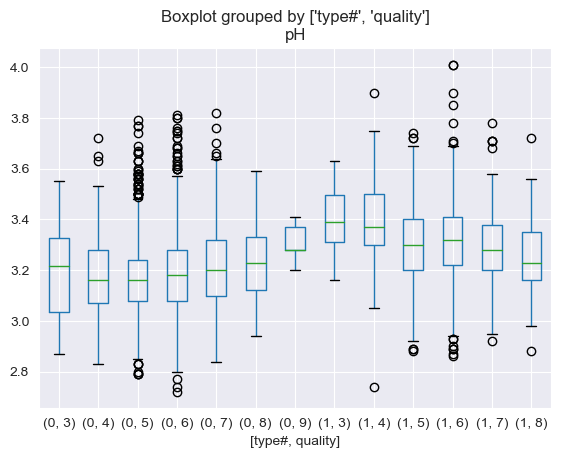

In [20]:
df_merged.boxplot(column = ['pH'], by=['type#','quality'])

<AxesSubplot: title={'center': 'alcohol'}, xlabel='[type#, quality]'>

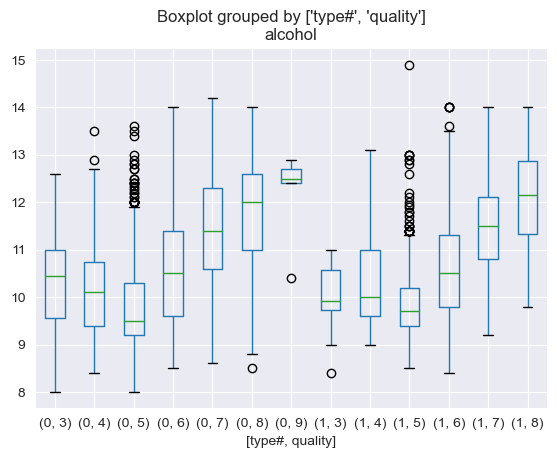

In [21]:
df_merged.boxplot(column = ['alcohol'], by=['type#','quality'])

type#
0    AxesSubplot(0.125,0.11;0.62x0.77)
1    AxesSubplot(0.125,0.11;0.62x0.77)
dtype: object

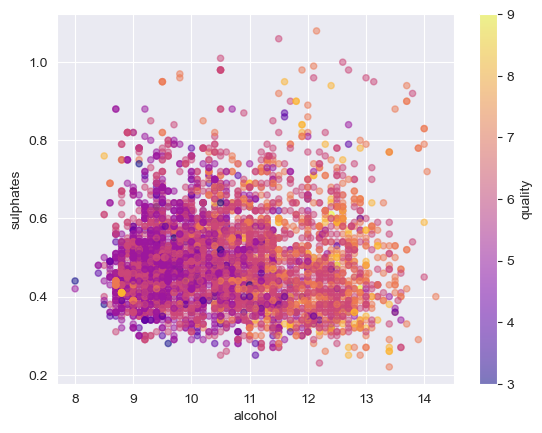

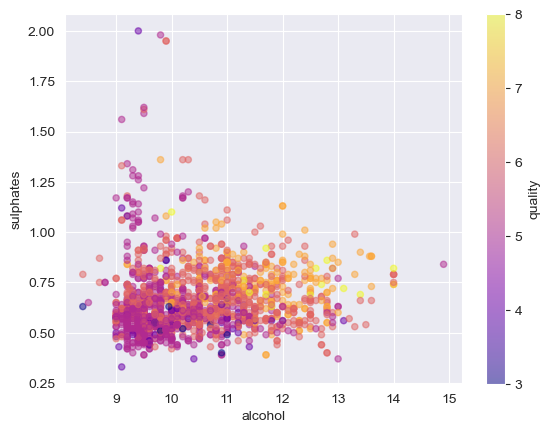

In [22]:
df_merged.groupby('type#').plot.scatter(x='alcohol', y='sulphates', c='quality', colormap='plasma', alpha = .5)

type#
0    AxesSubplot(0.125,0.11;0.62x0.77)
1    AxesSubplot(0.125,0.11;0.62x0.77)
dtype: object

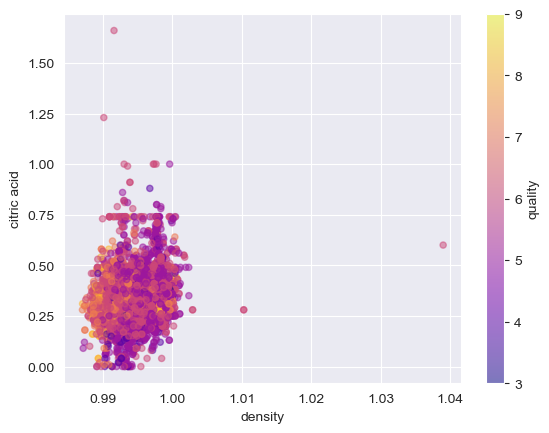

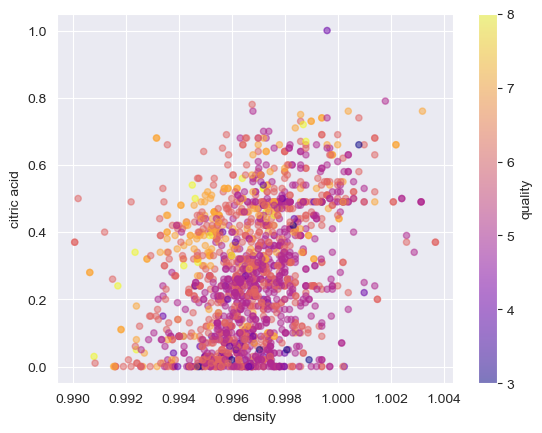

In [41]:
df_merged.groupby('type#').plot.scatter(x='density', y='citric acid', c='quality', colormap='plasma', alpha = .5)

In a few of the graphs above (such as white wine in density to citric acid by quality) we see the effect of extreme outliers. To get a better picture of the data, it would be best to remove these outliers and graph additional points to get a better understanding of the relationships within.

However, given the bounds and requirements of this project, doing so would be necessary and will instead be reserved for further assignments :)

## Exceptional (Extra) Work 😡

In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import umap

cats = df_merged[['type#','quality']]
df_merged_nums = df_merged.drop(columns=['type','type#','quality'], axis =0)

scaler = StandardScaler()
scaler.fit(df_merged_nums)
df_scaled = pd.DataFrame(scaler.transform(df_merged_nums), columns=list(df_merged_nums.columns))

df_merged_scaled = pd.concat([df_scaled,cats['type#']],axis = 1)

df_full_scaled = pd.concat([df_scaled,cats],axis = 1)
df_scaled_white = df_full_scaled[df_full_scaled['type#']==0]
df_scaled_red = df_full_scaled[df_full_scaled['type#']==1]

cats = cats.drop('type#',axis=1) #drop to use cats as target variable
le = LabelEncoder()
cats = le.fit_transform(cats)

# This is being done incorrectly, the train/test should be scaled seperated to prevent data leakage.
# idc tho because I'm not trying to make a model
X_train, X_test, y_train, y_test = train_test_split(df_merged_scaled, cats, test_size = 0.2)

X_train.head(3)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5851       2.302410          0.002029     1.110526       -0.702739  -0.115152   
1706      -0.628933         -0.605417    -0.678793       -0.828857  -0.514799   
5937       1.299582          0.973942    -0.747613       -0.681719   0.912512   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
5851            -1.438205             -1.888699 -0.038898 -0.115073   
1706             0.421155              0.729958 -0.432436  1.191102   
5937            -0.536697             -1.357890  0.741507  0.693511   

      sulphates   alcohol  type#  
5851   1.066785  1.348459      1  
1706   0.125890 -0.496219      0  
5937   2.007681  0.509969      1

Text(0.5, 1.0, 'Default UMAP projection of the Portuguese wine dataset by type')

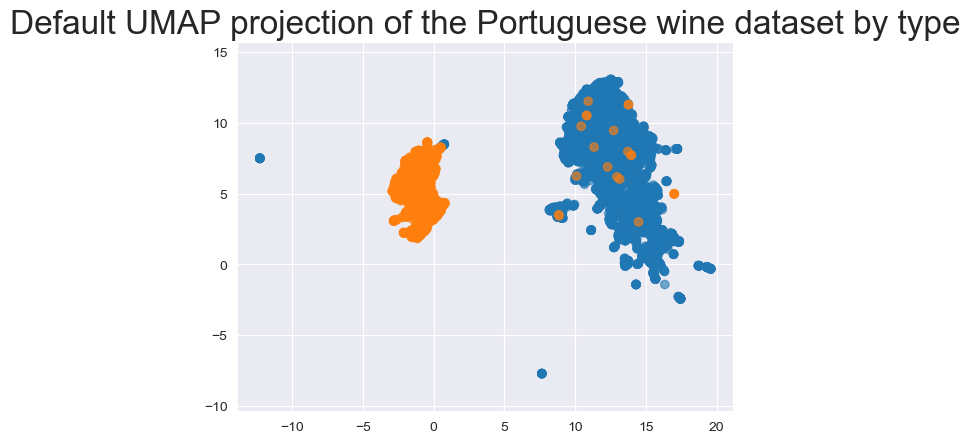

In [43]:
reducer = umap.UMAP(min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15)
embedding = reducer.fit_transform(df_merged_scaled)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_merged['type#']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Default UMAP projection of the Portuguese wine dataset by type', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Portuguese wine dataset by quality')

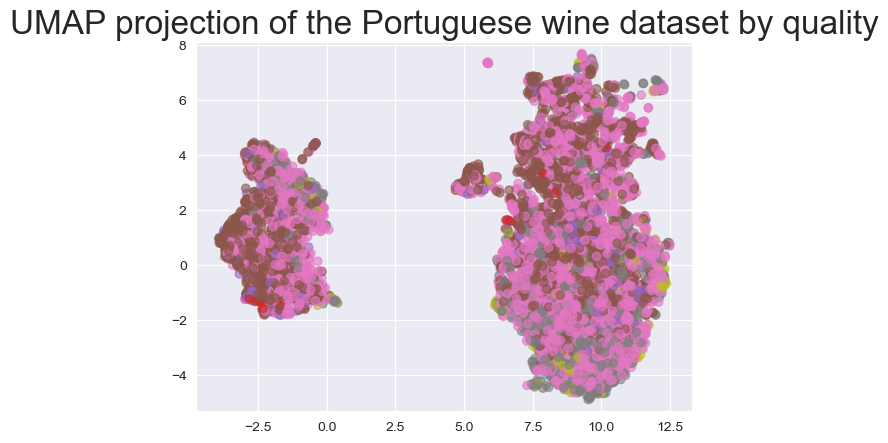

In [26]:
reducer = umap.UMAP(min_dist=0.3, n_components=2, n_epochs=None,
     n_neighbors=50)
embedding = reducer.fit_transform(df_merged_scaled)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_merged['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese wine dataset by quality', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Portuguese white wine dataset')

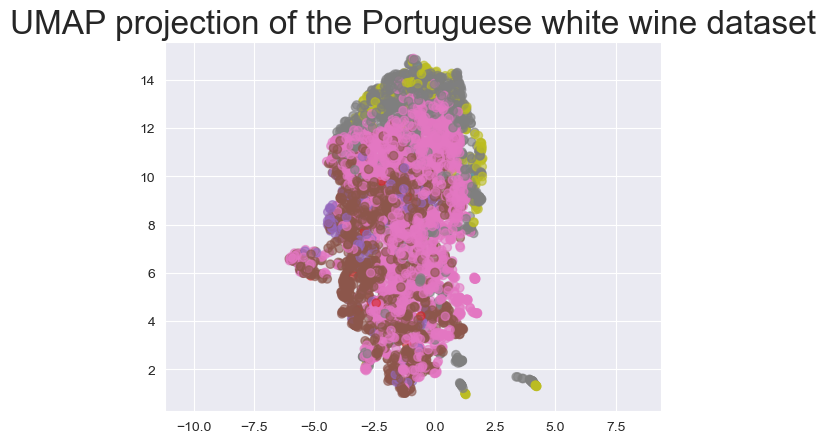

In [27]:
reducer = umap.UMAP(min_dist=0.3, n_components=2, n_epochs=None,
     n_neighbors=50)
embedding = reducer.fit_transform(df_scaled_white)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_scaled_white['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese white wine dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Portuguese red wine dataset')

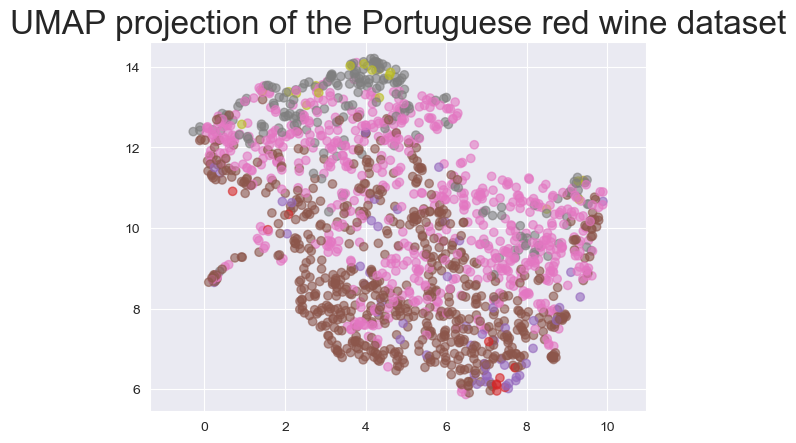

In [28]:
reducer = umap.UMAP(min_dist=0.3, n_components=2, n_epochs=None,
     n_neighbors=50)
embedding = reducer.fit_transform(df_scaled_red)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_scaled_red['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese red wine dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Portuguese white wine dataset, dist=.6, neighbors=120')

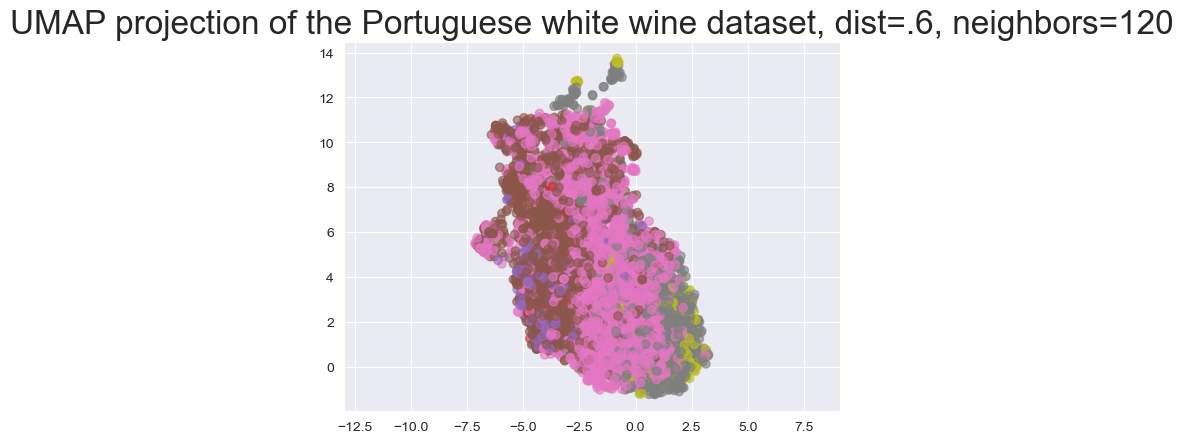

In [29]:
reducer = umap.UMAP(min_dist=0.6, n_components=2, n_epochs=None,
     n_neighbors=120)
embedding = reducer.fit_transform(df_scaled_white)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_scaled_white['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese white wine dataset, dist=.6, neighbors=120', fontsize=24)

/Users/michaelamberg/miniforge3/envs/basic_interpreter/lib/python3.10/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'UMAP projection of the Portuguese white wine dataset in "3D"')

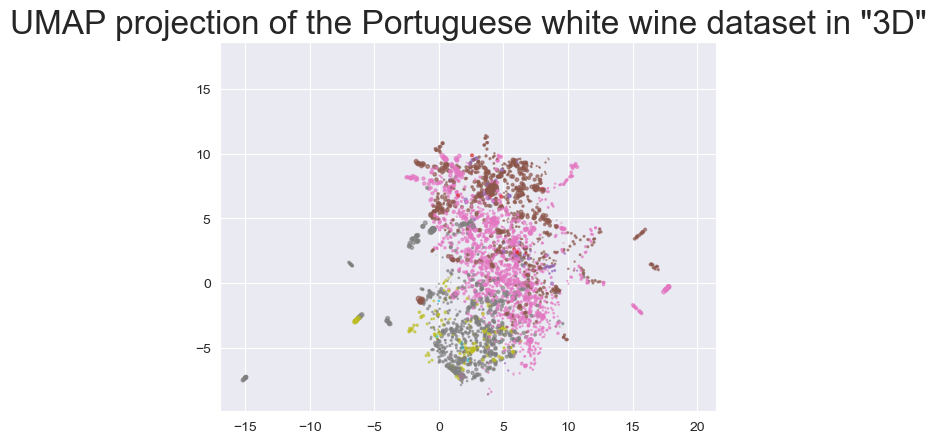

In [30]:
reducer = umap.UMAP(min_dist=.9, n_components=3, n_epochs=None,
     n_neighbors=5)
embedding = reducer.fit_transform(df_scaled_white)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=[sns.color_palette()[x] for x in df_scaled_white['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese white wine dataset in "3D"', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Portuguese red wine dataset in "3D"')

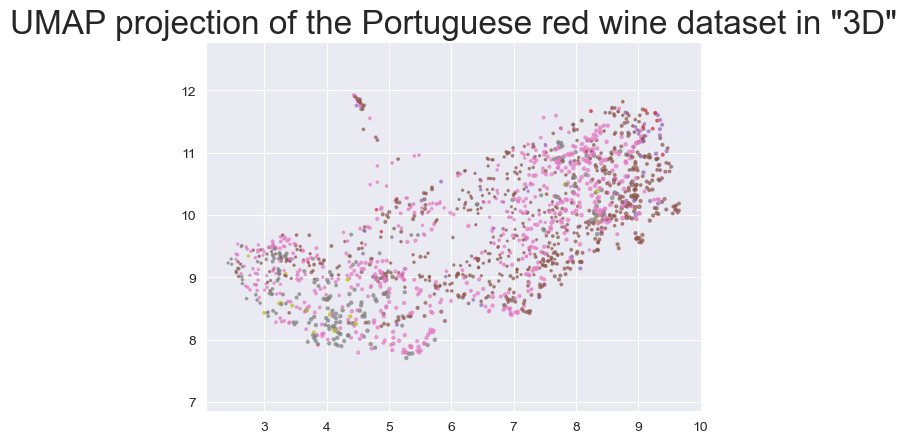

In [31]:
reducer = umap.UMAP(min_dist=.2, n_components=3, n_epochs=None,
     n_neighbors=160)
embedding = reducer.fit_transform(df_scaled_red)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=[sns.color_palette()[x] for x in df_scaled_red['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese red wine dataset in "3D"', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Portuguese red wine dataset using Manhattan Distance')

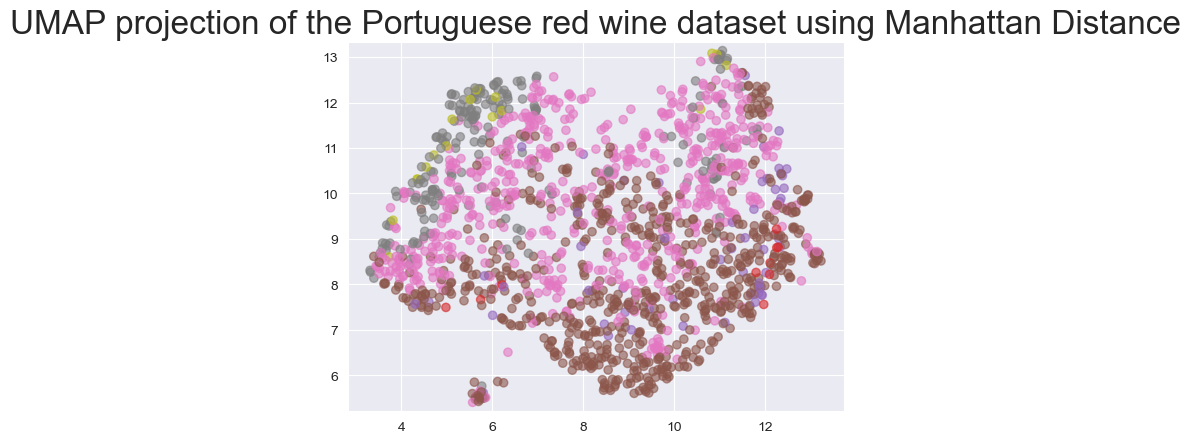

In [32]:
reducer = umap.UMAP(min_dist=0.3, n_components=2, metric = 'manhattan',
     n_neighbors=50)
embedding = reducer.fit_transform(df_scaled_red)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_scaled_red['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese red wine dataset using Manhattan Distance', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Portuguese red wine dataset using Canberra metric')

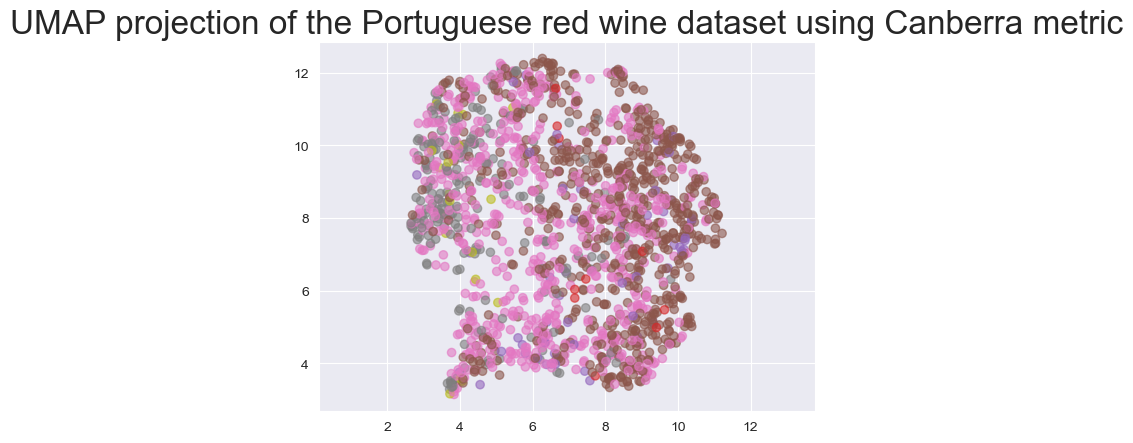

In [33]:
reducer = umap.UMAP(min_dist=0.4, n_components=2, metric = 'canberra',
     n_neighbors=50)
embedding = reducer.fit_transform(df_scaled_red)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_scaled_red['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Portuguese red wine dataset using Canberra metric', fontsize=24)


## UMAP Interpretation
From the different UMAP projections we can see groups form within the data point across multiple parameter changes. While it is hard to determine which projection is the 'best', the relatively distinct groupings of points proves that UMAP dimensionality reduction would be appropriate from the dataset.

A clear example is seen in the "UMAP projection of the Portuguese red wine dataset using Manhattan Distance" plot. In it, each point's color represents the quality of the wine. While there is some overlap, there are fairly distinct boundaries between the different wine qualities that are easy to follow.

Moving forward, the different wine types should have different parameters for dimensionality reduction. Because white wine has more entries and results in a more compacted graph, selecting parameters that would space these points further from each-other would allow more clear boundaries to form.

In both cases, we believe that dimensions should be reduced to 3 rather than two in order to better represent the original 12 features and form clearer groups.



## Applying KernelPCA dimensionality reduction


In [34]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf',
                 gamma=15)
white = kpca.fit_transform(df_scaled_white)
red = kpca.fit_transform(df_scaled_red)

Text(0.5, 1.0, 'KernelPCA projection of the Portuguese white wine dataset with rbf kernel')

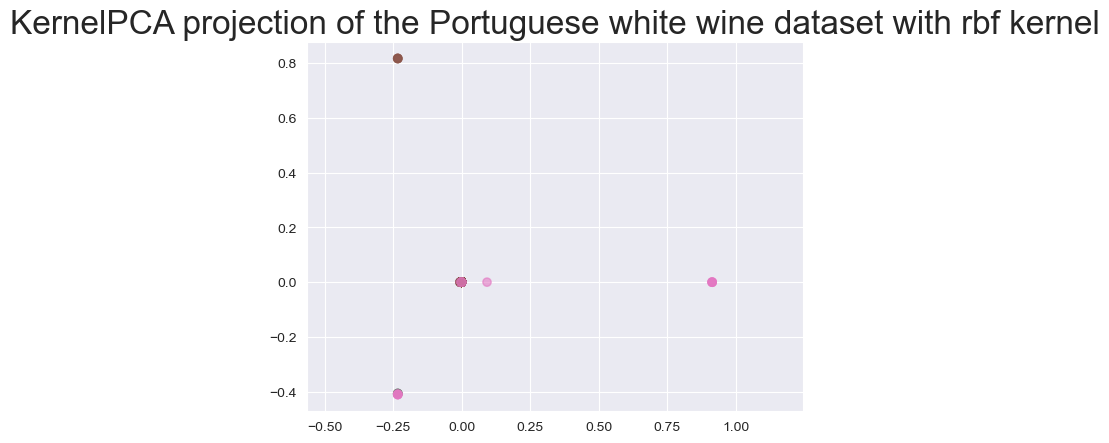

In [35]:
plt.scatter(
    red[:, 0],
    red[:, 1],
    c=[sns.color_palette()[x] for x in df_scaled_red['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('KernelPCA projection of the Portuguese white wine dataset with rbf kernel', fontsize=24)

Text(0.5, 1.0, 'KernelPCA projection of the Portuguese white wine dataset with poly kernel')

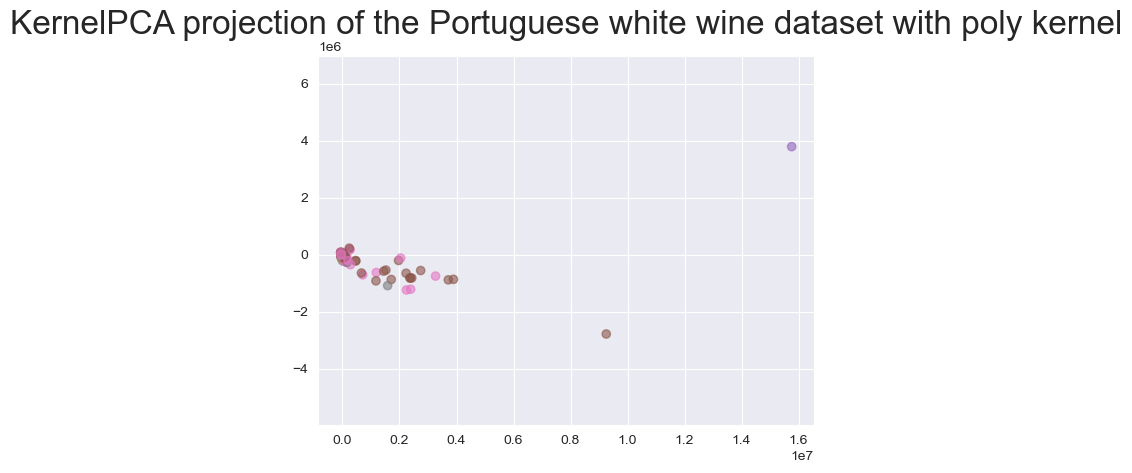

In [36]:
kpca = KernelPCA(n_components=2, kernel='poly',
                 gamma=10, degree = 4,  )
red = kpca.fit_transform(df_scaled_red)

plt.scatter(
    red[:, 0],
    red[:, 1],
    c=[sns.color_palette()[x] for x in df_scaled_red['quality']],
    alpha=.6)
plt.gca().set_aspect('equal', 'datalim')
plt.title('KernelPCA projection of the Portuguese white wine dataset with poly kernel', fontsize=24)

## KernelPCA analysis
KernelPCA seems to perform a similar job to UMAP, but the resulting data is far less detailed. There are far fewer data points discernible on the graph, so a clustering algorithm would struggle to perform accurately on the resulting table. For this reason, UMAP is would be the recommender dimensionality reduction algorithm used

## Looking at the SHAP values for the data
After applying a simple model (xgboost in this example) we can use the SHAP library to determine SHAP values.
These values represent the sway each individual element has towards the final prediction. By summerizing all these positive/negatives contributions across all features, we are able to see which features have the largest effect on final prediction.

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=5, max_depth=19, learning_rate=.7)
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds)) # awful accuracy but no cleaning has been done tbf

0.6423076923076924


In [38]:
import shap
# do not run this if you want to avoid waiting a minute or two
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 1301it [00:48, 21.83it/s]                          


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


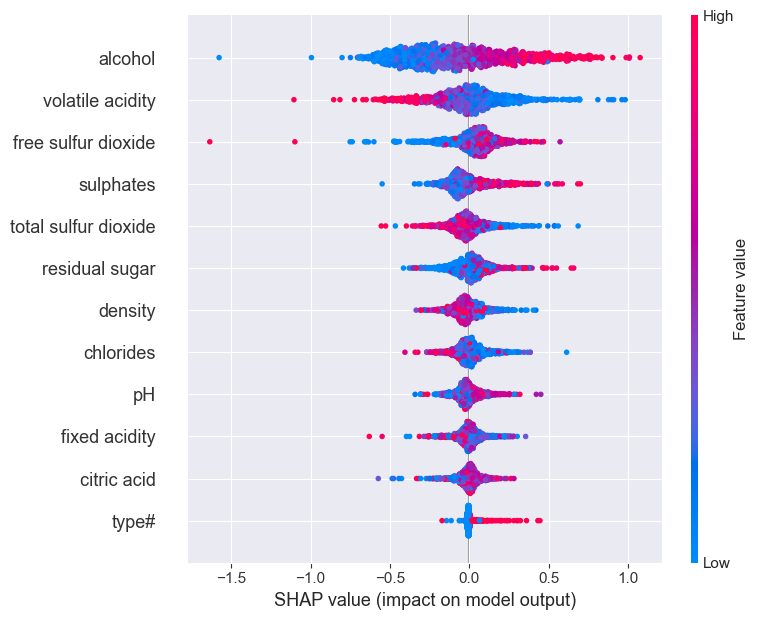

In [39]:
shap.summary_plot(shap_values)

From the above graph, ordered from most the least effect, we see that alcohol is the largest contributing factor towards quality prediction. If we wanted to just remove features that were less important to reduce dimensions, this could be a viable method to remove things such as fixed acidity and pH from the dataset to simplify it.